# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

True

In [3]:
# API KEY variableanalyzer
api_key=os.getenv('NEWS_API_KEY')
print(type(api_key))

<class 'str'>


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Define Get Articles with respect to key words.
def get_articles(keyword):    
    articles = newsapi.get_everything(
        q=keyword,
        language='en',
        sort_by='relevancy'
    )
    return articles

### Sentiment Analysis for Bitcoin

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = get_articles('bitcoin')
bitcoin_news_articles['articles'][1].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [7]:
# Creating Bitcoin DataFrame variable
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news_articles['articles']) 
bitcoin_df.dropna(inplace=True)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,https://www.wired.com/story/use-self-driving-c...,https://media.wired.com/photos/60f081b4c147fe7...,2021-07-19T11:00:00Z,"Like Dogecoin devotees, the mayor of Reno, and..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...,2021-07-05T19:45:10Z,Filed under:\r\nThe supply chain attack has re...
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-05T12:14:34Z,image copyrightGetty Images\r\nThe gang behind...
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",http://techcrunch.com/2021/07/23/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-23T22:10:45Z,To get a roundup of TechCrunchs biggest and mo...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...


In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]

for article in bitcoin_news_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame Sentiment
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ 'compound', 'positive', 'negative', 'neutral']
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_df = pd.merge(bitcoin_df , bitcoin_sentiment_df, left_index = True, right_index =True)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral
0,"{'id': 'wired', 'name': 'Wired'}",Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,https://www.wired.com/story/use-self-driving-c...,https://media.wired.com/photos/60f081b4c147fe7...,2021-07-19T11:00:00Z,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...,2021-07-05T19:45:10Z,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-05T12:14:34Z,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",http://techcrunch.com/2021/07/23/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-23T22:10:45Z,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.014545,0.055900,0.051300,0.892800
std,0.471377,0.060072,0.091597,0.107686
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.119175,0.000000,0.000000,0.836000
50%,0.000000,0.048500,0.000000,0.910500
75%,0.315000,0.092500,0.078250,1.000000
max,0.726400,0.178000,0.287000,1.000000


### Sentiment Analysis for Ethereum

In [10]:
# Fetch the Ethereum news articles
ethereum_news_articles = get_articles('ethereum')
ethereum_news_articles['articles'][1].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [11]:
# Creating Ethereum DataFrame variable 
ethereum_df = pd.DataFrame.from_dict(ethereum_news_articles['articles']) 
ethereum_df.dropna(inplace=True)
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,http://techcrunch.com/2021/07/16/crypto-invest...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-16T16:00:55Z,There are many blockchain platforms competing ...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,http://techcrunch.com/2021/07/29/tenderly-rais...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Amazon Posts Crypto Job Listing, Bitcoin Skyro...","Bitcoin hit a six-week high of nearly $39,043 ...",https://www.entrepreneur.com/article/378516,https://assets.entrepreneur.com/content/3x2/20...,2021-07-27T13:52:40Z,Cryptocurrencies spiked Monday after Amazon li...
4,"{'id': 'business-insider', 'name': 'Business I...",cshumba@insider.com (Camomile Shumba ),Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-02T15:49:56Z,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...


In [12]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in ethereum_news_articles['articles']:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame Sentiment
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = [ 'compound', 'positive', 'negative', 'neutral']
ethereum_sentiment_df = ethereum_sentiment_df[cols]

ethereum_df = pd.merge(ethereum_df , ethereum_sentiment_df, left_index = True, right_index =True)
ethereum_df

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,http://techcrunch.com/2021/07/16/crypto-invest...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-16T16:00:55Z,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,http://techcrunch.com/2021/07/29/tenderly-rais...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Amazon Posts Crypto Job Listing, Bitcoin Skyro...","Bitcoin hit a six-week high of nearly $39,043 ...",https://www.entrepreneur.com/article/378516,https://assets.entrepreneur.com/content/3x2/20...,2021-07-27T13:52:40Z,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895
4,"{'id': 'business-insider', 'name': 'Business I...",cshumba@insider.com (Camomile Shumba ),Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-02T15:49:56Z,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
5,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Ethereum Co-Founder Says Safety Concern Has Hi...,"""Anthony Di Iorio, a co-founder of the Ethereu...",https://news.slashdot.org/story/21/07/17/00425...,https://a.fsdn.com/sd/topics/money_64.png,2021-07-17T14:34:00Z,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
6,"{'id': 'reuters', 'name': 'Reuters'}",Gertrude Chavez-dreyfuss,Explainer: Major Ethereum upgrade set to alter...,"Ethereum, the second-largest blockchain networ...",https://www.reuters.com/technology/major-ether...,https://www.reuters.com/resizer/1WRoxyTTLAQrfs...,2021-07-30T05:04:00Z,Representations of cryptocurrency Ethereum are...,0.0000,0.000,0.000,1.000
7,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...",https://www.businessinsider.com/ether-eth-ethe...,https://i.insider.com/60e2fbcb22d19400191c913f...,2021-07-05T12:54:02Z,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806
8,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...",https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-05T12:54:02Z,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850
9,"{'id': None, 'name': 'VentureBeat'}",Dean Takahashi,Livepeer snags $20M for decentralized video tr...,Livepeer has raised $20 million for its decent...,https://venturebeat.com/2021/07/29/livepeer-sn...,https://venturebeat.com/wp-content/uploads/202...,2021-07-29T11:00:02Z,All the sessions from Transform 2021 are avail...,0.0000,0.000,0.000,1.000


In [13]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.247720,0.073250,0.015500,0.911250
std,0.326828,0.073203,0.028127,0.078638
min,-0.340000,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.295000,0.077500,0.000000,0.922500
75%,0.528675,0.149250,0.010250,1.000000
max,0.771700,0.194000,0.072000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has a mean positive score of  0.073250 which is higher than Bitcoin which has a mean positive score of 0.051750.

Q: Which coin had the highest compound score?

A: Ethereum has a highest compound score of  0.771700 which is higher than Bitcoin which has its highest compound score of 0.726400.

Q. Which coin had the highest positive score?

A: Ethereum has a highest positive score of  0.194000 which is higher than Bitcoin which has its highest positive score of 0.178000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

nltk.download('stopwords')

# Expand the default stopwords list if necessary
sw = stopwords.words('english')
sw.append('u')
sw.append('it')
sw.append("'s")
sw.append("n't")
sw.append('…')
sw.append("\`")
sw.append('``')
sw.append('char')
sw.append('chars')
sw.append("''")
sw.append('"')
sw.append('tldr')
sw.append("’")
sw.append('ul><li')

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    text = regex.sub('', text)
    
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]   
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['content'].apply(tokenizer)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral,tokens
0,"{'id': 'wired', 'name': 'Wired'}",Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,https://www.wired.com/story/use-self-driving-c...,https://media.wired.com/photos/60f081b4c147fe7...,2021-07-19T11:00:00Z,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[Like, Dogecoin, devotee, the, mayor, of, Reno..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...,2021-07-05T19:45:10Z,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[Filed, underThe, supply, chain, attack, ha, r..."
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-05T12:14:34Z,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightGetty, ImagesThe, gang, behin..."
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",http://techcrunch.com/2021/07/23/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-23T22:10:45Z,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[To, get, a, roundup, of, TechCrunchs, biggest..."
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[While, retail, investor, grew, more, comforta..."


In [18]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['content'].apply(tokenizer)
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral,tokens
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,http://techcrunch.com/2021/07/16/crypto-invest...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-16T16:00:55Z,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[There, are, many, blockchain, platform, compe..."
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,http://techcrunch.com/2021/07/29/tenderly-rais...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[Blockchain, infrastructure, startup, are, hea..."
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[While, retail, investor, grew, more, comforta..."
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Amazon Posts Crypto Job Listing, Bitcoin Skyro...","Bitcoin hit a six-week high of nearly $39,043 ...",https://www.entrepreneur.com/article/378516,https://assets.entrepreneur.com/content/3x2/20...,2021-07-27T13:52:40Z,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895,"[Cryptocurrencies, spiked, Monday, after, Amaz..."
4,"{'id': 'business-insider', 'name': 'Business I...",cshumba@insider.com (Camomile Shumba ),Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-02T15:49:56Z,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[Bitcoin, and, EthereumYuriko, NakaoEther, ove..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
input_text_bitcoin = []

for index in bitcoin_df.index:
    for token in bitcoin_df['tokens'].loc[index]:
        input_text_bitcoin.append(token)
    

bigram_counts_bitcoin = Counter(ngrams(input_text_bitcoin, n=2)).most_common(20)
print(dict(bigram_counts_bitcoin))

{('in', 'this'): 7, ('this', 'illustration'): 7, ('seen', 'in'): 6, ('of', 'virtual'): 5, ('virtual', 'currency'): 5, ('in', 'front'): 5, ('front', 'of'): 5, ('illustration', 'taken'): 5, ('A', 'representation'): 4, ('representation', 'of'): 4, ('is', 'seen'): 4, ('of', 'a'): 4, ('a', 'stock'): 4, ('stock', 'graph'): 4, ('graph', 'in'): 4, ('Reuters', 'Bitcoin'): 3, ('char', 'A'): 3, ('Representations', 'of'): 3, ('currency', 'bitcoin'): 3, ('attack', 'ha'): 2}


In [21]:
# Generate the Ethereum N-grams where N=2
input_text_ethereum = []

for index in ethereum_df.index:
    for token in ethereum_df['tokens'].loc[index]:
        input_text_ethereum.append(token)
    
bigram_counts_ethereum = Counter(ngrams(input_text_ethereum, n=2)).most_common(20)
print(dict(bigram_counts_ethereum))

{('of', 'the'): 8, ('the', 'cryptocurrency'): 4, ('on', 'the'): 4, ('the', 'ethereum'): 4, ('the', 'Ethereum'): 3, ('in', 'this'): 3, ('this', 'illustration'): 3, ('ethereum', 'network'): 3, ('from', 'our'): 3, ('up', 'a'): 2, ('char', 'While'): 2, ('Bitcoin', 'and'): 2, ('in', 'the'): 2, ('Representations', 'of'): 2, ('taken', 'June'): 2, ('char', 'Ether'): 2, ('holder', 'have'): 2, ('have', 'staked'): 2, ('staked', 'more'): 2, ('more', 'than'): 2}


In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
top_bitcoin = token_count(input_text_bitcoin)
print(top_bitcoin)

[('of', 24), ('a', 21), ('char', 20), ('in', 20), ('the', 13), ('Bitcoin', 10), ('this', 9), ('and', 8), ('is', 8), ('for', 8)]


In [24]:
# Use token_count to get the top 10 words for Ethereum
top_ethereum = token_count(input_text_ethereum)
print(top_ethereum)

[('the', 32), ('of', 21), ('char', 20), ('a', 19), ('to', 14), ('in', 11), ('and', 9), ('Ethereum', 9), ('on', 8), ('cryptocurrency', 8)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

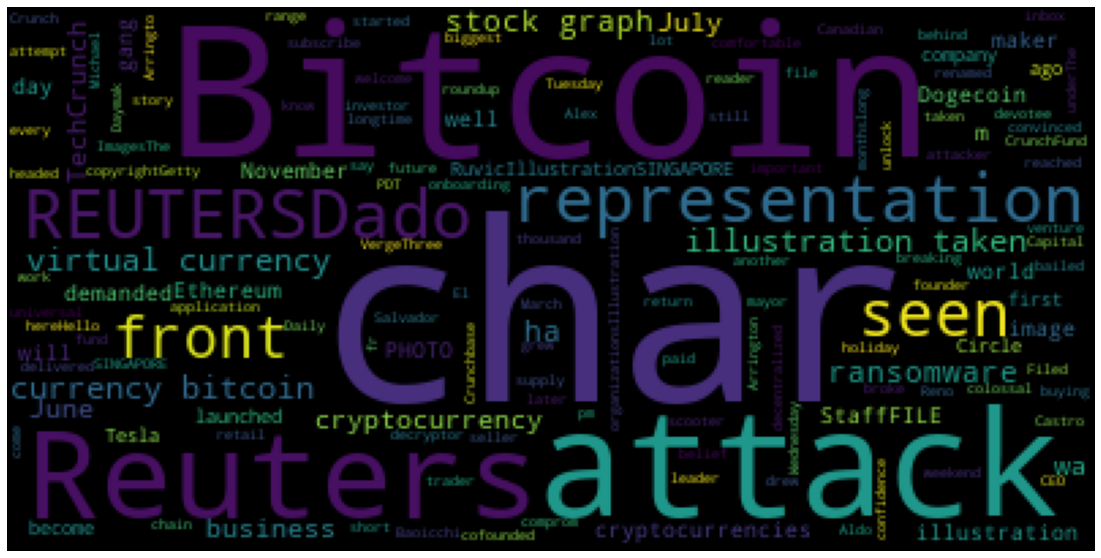

In [26]:
# Generate the Bitcoin word cloud
input_text = []

for index in bitcoin_df.index:
    input_text.append(" ".join(bitcoin_df['tokens'].loc[index]))

input_text = " ".join(input_text)

wc = WordCloud().generate(input_text)

plt.axis('off')
plt.imshow(wc);

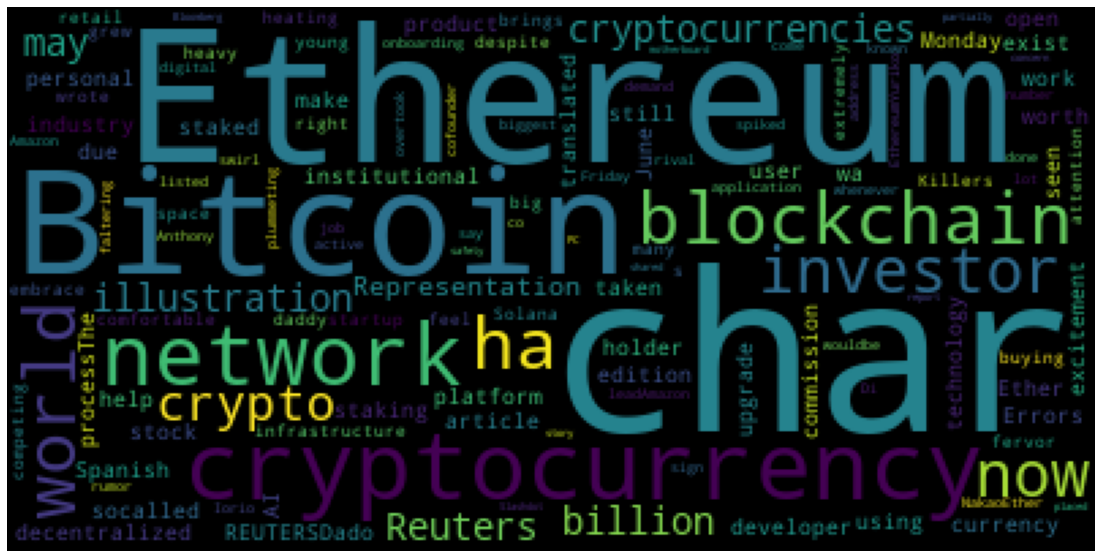

In [27]:
# Generate the Ethereum word cloud
input_text_eth = []

for index in ethereum_df.index:
    input_text_eth.append(" ".join(ethereum_df['tokens'].loc[index]))

input_text_eth = " ".join(input_text_eth)

wc_eth = WordCloud().generate(input_text_eth)
plt.axis('off')
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
bitcoin_all_text = ''
for index in bitcoin_df.index:
    bitcoin_all_text = bitcoin_all_text + '\n' + bitcoin_df['content'].loc[index]


In [32]:
# Run the NER processor on all of the text
bitcoin_nlp_text = nlp(bitcoin_all_text)

# Add a title to the document
bitcoin_nlp_text.user_data['title'] ='Bitcoin Named Entity Recognition'

In [33]:
# Render the visualization
displacy.render(bitcoin_nlp_text, style= 'ent', jupyter = True)

In [34]:
# List all Entities
list_ent = [(ent.text, ent.label_)for ent in bitcoin_nlp_text.ents]
print(list_ent)

[('Reno', 'GPE'), ('El Salvador', 'GPE'), ('Aldo Baoicchi', 'GPE'), ('Canadian', 'NORP'), ('Daymak', 'ORG'), ('Alex Castro', 'PERSON'), ('The Verge', 'ORG'), ('Three days', 'DATE'), ('the holiday weekend', 'DATE'), ('copyrightGetty Images', 'PERSON'), ('$70m', 'MONEY'), ('£50.5m', 'MONEY'), ('every day', 'DATE'), ('3 p.m. PDT', 'TIME'), ('Daily Crunch', 'ORG'), ('July 23, 2021', 'DATE'), ('Bitcoin and Ethereum', 'ORG'), ('2021', 'DATE'), ('Michael Arrington', 'PERSON'), ('TechCrunch', 'LOC'), ('Crunchbase', 'ORG'), ('CrunchFund', 'PRODUCT'), ('Tuesday', 'DATE'), ('2017', 'DATE'), ('July 28', 'DATE'), ('Reuters', 'ORG'), ('40,000', 'MONEY'), ('Wednesday', 'DATE'), ('March 15, 2021', 'DATE'), ('REUTERS', 'ORG'), ('Dado Ruvic/', 'PERSON'), ('June 30', 'DATE'), ('Reuters', 'ORG'), ('Reuters', 'ORG'), ('FILE', 'ORG'), ('June 7, 2021', 'DATE'), ('REUTERS', 'ORG'), ('Edgar Su/Illustration/File Photo', 'PERSON'), ('Reuters', 'ORG'), ('+304', 'PERSON'), ('James Martin', 'PERSON'), ('UK', 'GPE')

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
ethereum_all_text = ''
for index in ethereum_df.index:
    ethereum_all_text = ethereum_all_text + '\n' + ethereum_df['content'].loc[index]

In [36]:
# Run the NER processor on all of the text
ethereum_nlp_text = nlp(ethereum_all_text)

# Add a title to the document
ethereum_nlp_text.user_data['title'] ='Ethereum Named Entity Recognition'

In [37]:
# Render the visualization
displacy.render(ethereum_nlp_text, style= 'ent', jupyter = True)

In [38]:
# List all Entities
list_ent = [(ent.text, ent.label_)for ent in ethereum_nlp_text.ents]
print(list_ent) 

[('Ethereum', 'PERSON'), ('Ethereum Killers', 'WORK_OF_ART'), ('Solana', 'PERSON'), ('Bitcoin and Ethereum', 'ORG'), ('2021', 'DATE'), ('Monday', 'DATE'), ('Amazon', 'ORG'), ('Amazon', 'ORG'), ('Yuriko Nakao', 'PERSON'), ('Friday', 'DATE'), ('Anthony Di Iorio', 'PERSON'), ('Ethereum', 'PERSON'), ('Bloomberg', 'PERSON'), ('Slashdot', 'NORP'), ('Ethereum', 'PERSON'), ('June 29, 2021', 'DATE'), ('REUTERS', 'ORG'), ('Dado Ruvic', 'PERSON'), ('July 30', 'DATE'), ('Reuters', 'ORG'), ('second', 'ORDINAL'), ('more than $13 billion', 'MONEY'), ('2.0', 'CARDINAL'), ('Photothek', 'PERSON'), ('more than $13 billion', 'MONEY'), ('2.0', 'CARDINAL'), ('Livepeer', 'PERSON'), ('$20 million', 'MONEY'), ('Ethereum', 'PERSON'), ('Spanish', 'NORP'), ('AI', 'ORG'), ('Xoy Capital', 'PERSON'), ('Guadalajara', 'GPE'), ('Jalisco', 'GPE'), ('Xoycoin', 'PERSON'), ('$40 billion', 'MONEY'), ('2025', 'DATE'), ('JPMorgan', 'ORG'), ('recent months', 'DATE'), ('Monday', 'DATE'), ('Chicago Bulls', 'ORG'), ('American Exp

---